In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
df = pd.read_csv('temperature-quotidienne-regionale.csv', sep=';')
df.tail()

,Date,Code INSEE région,Région,TMin (°C),TMax (°C),TMoy (°C)
19573,2020-02-26,84,Auvergne-Rhône-Alpes,2.45,6.91,4.68
19574,2020-02-26,27,Bourgogne-Franche-Comté,1.60,7.15,4.38
19575,2020-02-26,93,Provence-Alpes-Côte d'Azur,6.25,11.52,8.88
19576,2020-02-26,53,Bretagne,2.68,11.35,7.01
19577,2020-02-27,94,Corse,6.15,16.15,11.15


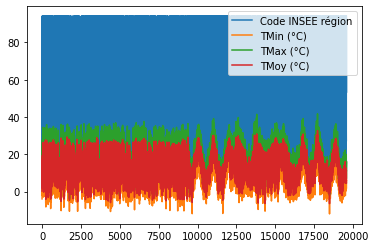

In [3]:
df.plot()

Text(0, 0.5, 'TMoy (°C)')

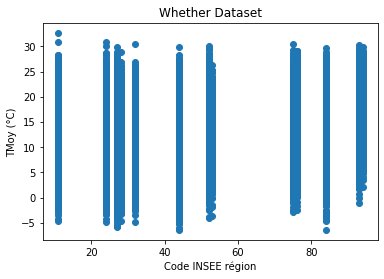

In [4]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(df['Code INSEE région'], df['TMoy (°C)'])
# set a title and labels
ax.set_title('Whether Dataset')
ax.set_xlabel('Code INSEE région')
ax.set_ylabel('TMoy (°C)')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



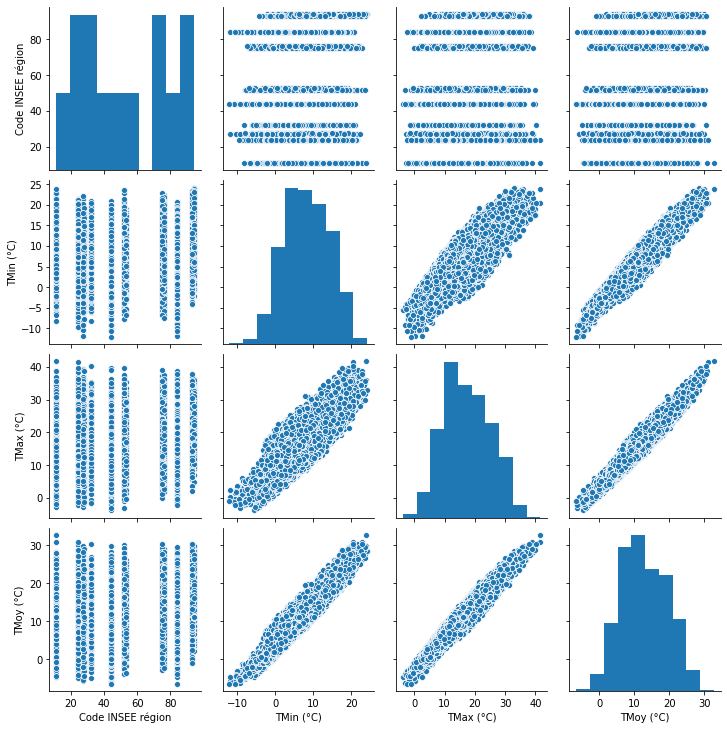

In [5]:
import seaborn as sns
sns.pairplot(df)

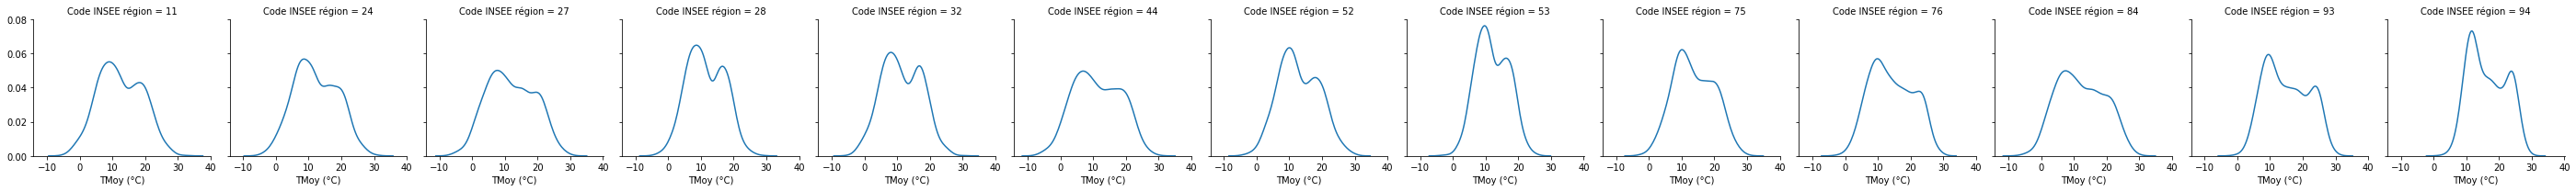

In [6]:
g = sns.FacetGrid(df, col='Code INSEE région')
g = g.map(sns.kdeplot, 'TMoy (°C)')

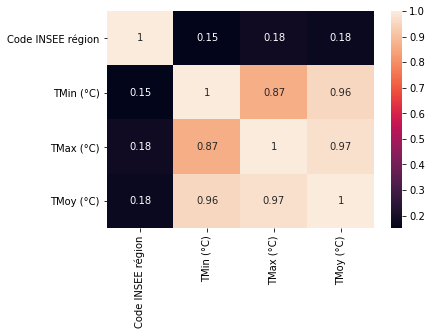

In [7]:
sns.heatmap(df.corr(), annot=True)

In [8]:
df = df.dropna()



print("Null values:")
df.isnull().sum()

Null values:


Date                 0
Code INSEE région    0
Région               0
TMin (°C)            0
TMax (°C)            0
TMoy (°C)            0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19578 entries, 0 to 19577
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               19578 non-null  object 
 1   Code INSEE région  19578 non-null  int64  
 2   Région             19578 non-null  object 
 3   TMin (°C)          19578 non-null  float64
 4   TMax (°C)          19578 non-null  float64
 5   TMoy (°C)          19578 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.0+ MB


In [10]:
# drop columns 
df.drop(columns=['Code INSEE région','Région','TMin (°C)','TMax (°C)'], axis=1)
df.head()

,Date,Code INSEE région,Région,TMin (°C),TMax (°C),TMoy (°C)
0,2016-02-17,11,Ile-de-France,-3.94,4.42,0.24
1,2016-02-19,84,Auvergne-Rhône-Alpes,0.09,7.07,3.58
2,2016-02-20,44,Grand-Est,0.56,11.10,5.83
3,2016-02-21,52,Pays de la Loire,9.80,12.15,10.98
4,2016-02-23,44,Grand-Est,2.36,8.20,5.28


In [11]:
df = df.set_index('Date')
df.index

Index(['2016-02-17', '2016-02-19', '2016-02-20', '2016-02-21', '2016-02-23',
       '2016-02-29', '2016-03-06', '2016-03-06', '2016-03-09', '2016-03-09',
       ...
       '2020-02-24', '2020-02-24', '2020-02-25', '2020-02-25', '2020-02-25',
       '2020-02-26', '2020-02-26', '2020-02-26', '2020-02-26', '2020-02-27'],
      dtype='object', name='Date', length=19578)

In [12]:
df_processed=df.drop(columns=['Code INSEE région','Région','TMin (°C)','TMax (°C)'], axis=1)
df_processed.head()

,TMoy (°C)
Date,
2016-02-17,0.24
2016-02-19,3.58
2016-02-20,5.83
2016-02-21,10.98
2016-02-23,5.28


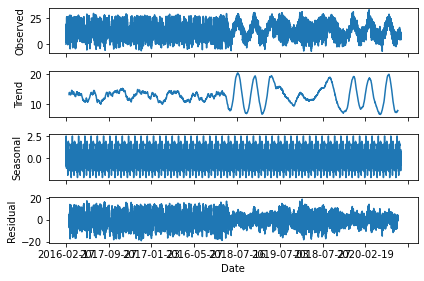

In [13]:
import statsmodels.api as sm 
def show_seasonal_decompose(df):
    decomp = sm.tsa.seasonal_decompose(df, model="additive", freq=365)
    decomp.plot()

show_seasonal_decompose(df_processed)

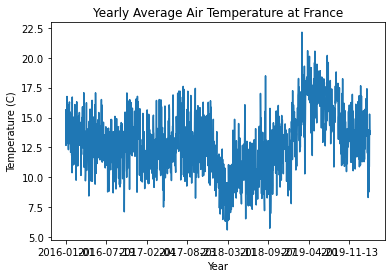

In [14]:
def plot_yearly_avg(df_processed):
    df_cpy = df_processed.copy()
    df_cpy = df_processed.sort_index()

    g = df_cpy.groupby(df_processed.index)["TMoy (°C)"].mean()
    g = g.drop(g.tail(1).index) # We only keep data up to 2019 since 2020 data is imcomplete

    ax = g.plot()
    ax.set_title("Yearly Average Air Temperature at France")
    ax.set_xlabel("Year")
    ax.set_ylabel("Temperature (C)")
plot_yearly_avg(df_processed)



In [15]:
df_processed['ds'] = df_processed.index
df_processed['y'] = df_processed['TMoy (°C)']
df_processed = df_processed.drop(['TMoy (°C)'], axis=1)
df_processed

,ds,y
Date,,
2016-02-17,2016-02-17,0.24
2016-02-19,2016-02-19,3.58
2016-02-20,2016-02-20,5.83
2016-02-21,2016-02-21,10.98
2016-02-23,2016-02-23,5.28
...,...,...
2020-02-26,2020-02-26,4.68
2020-02-26,2020-02-26,4.38
2020-02-26,2020-02-26,8.88


In [16]:
model=Prophet()
model.fit(df_processed)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
future=model.make_future_dataframe(periods=365
                                   )
future.tail()

,ds
19938,2021-02-23
19939,2021-02-24
19940,2021-02-25
19941,2021-02-26
19942,2021-02-27


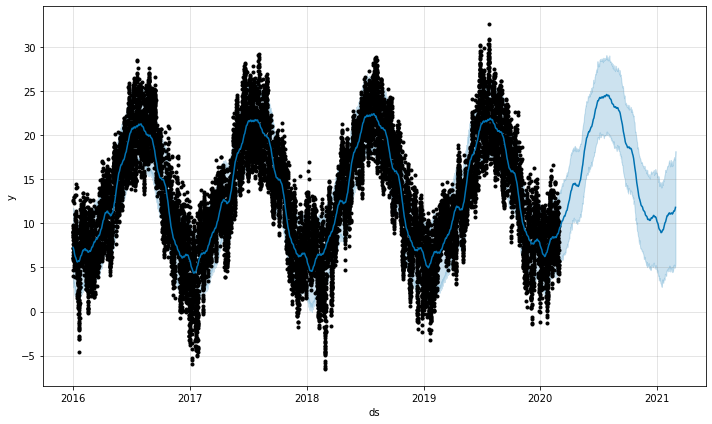

In [18]:
forecast=model.predict(future)
model.plot(forecast);

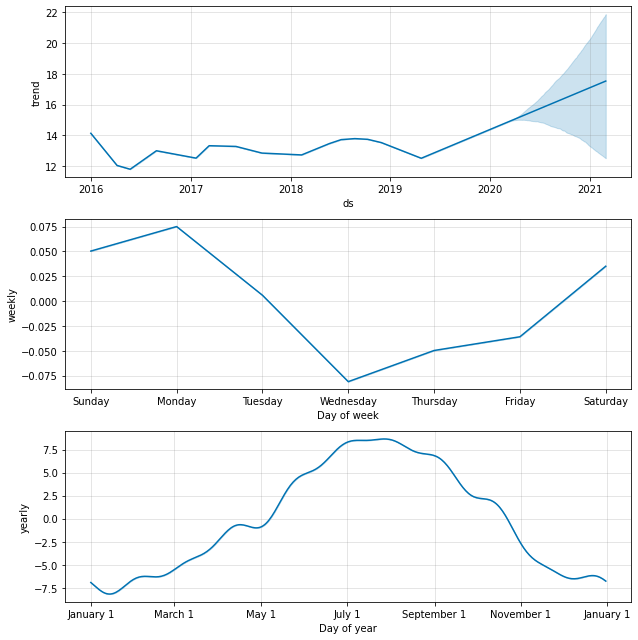

In [19]:
model.plot_components(forecast);

In [0]:
recent = df_processed[df_processed.ds < '2019-01-01']

In [27]:
recent.tail()

,ds,y
Date,,
2018-12-31,2018-12-31,9.10
2018-12-31,2018-12-31,5.05
2018-12-31,2018-12-31,10.55
2018-12-31,2018-12-31,4.00
2018-12-31,2018-12-31,4.84


In [28]:
model_recent = Prophet()
model_recent.fit(recent)
future_recent = model_recent.make_future_dataframe(periods=365)
forecast_recent = model_recent.predict(future_recent)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


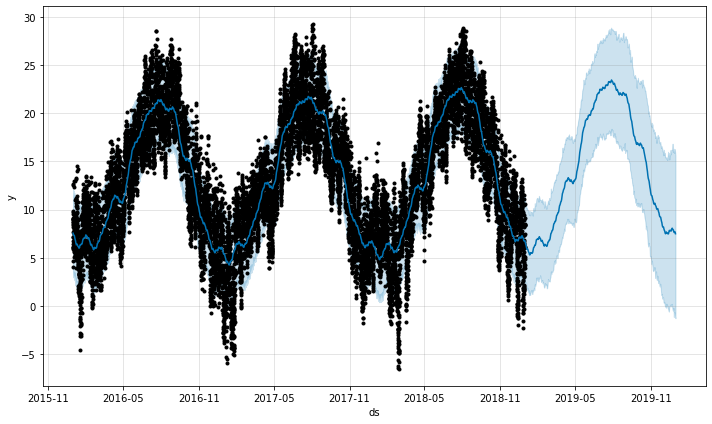

In [29]:
model_recent.plot(forecast_recent);

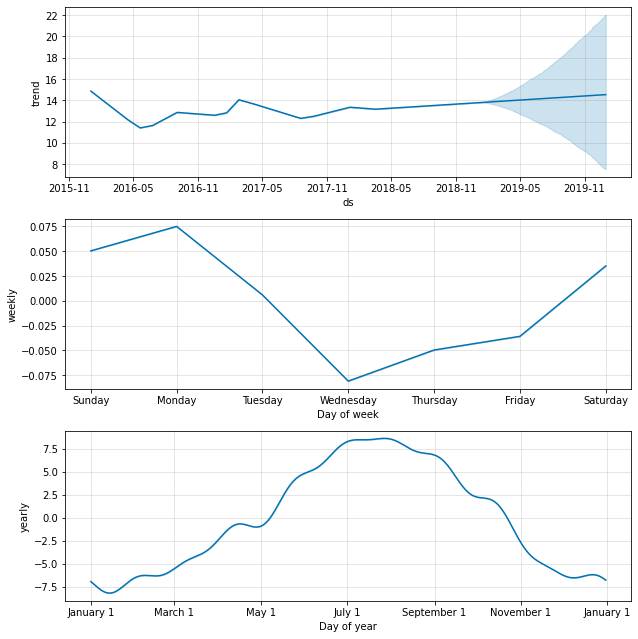

In [30]:
model.plot_components(forecast_recent);

In [31]:
forecast_recent

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,14.870969,3.424869,11.993721,14.870969,14.870969,-7.315598,-7.315598,-7.315598,-0.108073,-0.108073,-0.108073,-7.207525,-7.207525,-7.207525,0.0,0.0,0.0,7.555371
1,2016-01-01,14.870969,3.674460,11.872359,14.870969,14.870969,-7.315598,-7.315598,-7.315598,-0.108073,-0.108073,-0.108073,-7.207525,-7.207525,-7.207525,0.0,0.0,0.0,7.555371
2,2016-01-01,14.870969,3.553127,11.765029,14.870969,14.870969,-7.315598,-7.315598,-7.315598,-0.108073,-0.108073,-0.108073,-7.207525,-7.207525,-7.207525,0.0,0.0,0.0,7.555371
3,2016-01-01,14.870969,3.491488,11.784225,14.870969,14.870969,-7.315598,-7.315598,-7.315598,-0.108073,-0.108073,-0.108073,-7.207525,-7.207525,-7.207525,0.0,0.0,0.0,7.555371
4,2016-01-01,14.870969,3.506090,12.135890,14.870969,14.870969,-7.315598,-7.315598,-7.315598,-0.108073,-0.108073,-0.108073,-7.207525,-7.207525,-7.207525,0.0,0.0,0.0,7.555371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14582,2019-12-27,14.527169,-1.122075,16.114722,7.609084,21.937899,-6.821824,-6.821824,-6.821824,-0.108073,-0.108073,-0.108073,-6.713751,-6.713751,-6.713751,0.0,0.0,0.0,7.705345
14583,2019-12-28,14.529265,-0.613917,15.888059,7.601964,21.976411,-6.907208,-6.907208,-6.907208,-0.120392,-0.120392,-0.120392,-6.786816,-6.786816,-6.786816,0.0,0.0,0.0,7.622057
14584,2019-12-29,14.531361,-0.796219,16.283168,7.594740,22.010342,-6.875211,-6.875211,-6.875211,-0.000933,-0.000933,-0.000933,-6.874278,-6.874278,-6.874278,0.0,0.0,0.0,7.656150
14585,2019-12-30,14.533457,-1.088757,16.058296,7.552213,22.044272,-6.838868,-6.838868,-6.838868,0.135920,0.135920,0.135920,-6.974788,-6.974788,-6.974788,0.0,0.0,0.0,7.694589


In [32]:
df.head()

,Code INSEE région,Région,TMin (°C),TMax (°C),TMoy (°C)
Date,,,,,
2016-02-17,11,Ile-de-France,-3.94,4.42,0.24
2016-02-19,84,Auvergne-Rhône-Alpes,0.09,7.07,3.58
2016-02-20,44,Grand-Est,0.56,11.10,5.83
2016-02-21,52,Pays de la Loire,9.80,12.15,10.98
2016-02-23,44,Grand-Est,2.36,8.20,5.28


In [43]:
df_idf=df[df['Région']=="Ile-de-France"]
df_idf.count

<bound method DataFrame.count of             Code INSEE région         Région  TMin (°C)  TMax (°C)  TMoy (°C)
Date                                                                         
2016-02-17                 11  Ile-de-France      -3.94       4.42       0.24
2017-09-12                 11  Ile-de-France      11.16      18.62      14.89
2016-01-12                 11  Ile-de-France       4.78       7.82       6.30
2016-05-05                 11  Ile-de-France       7.06      20.16      13.61
2016-04-11                 11  Ile-de-France       9.48      14.94      12.21
...                       ...            ...        ...        ...        ...
2020-02-02                 11  Ile-de-France      10.60      15.56      13.08
2020-02-10                 11  Ile-de-France       7.60      11.80       9.70
2020-02-12                 11  Ile-de-France       3.46       9.54       6.50
2020-02-20                 11  Ile-de-France       6.76      11.32       9.04
2020-02-23                 11  

In [0]:
df_idf=df_idf.drop(columns=['Code INSEE région','Région','TMin (°C)','TMax (°C)'],axis=1)

In [46]:
df_idf

,TMoy (°C)
Date,
2016-02-17,0.24
2017-09-12,14.89
2016-01-12,6.30
2016-05-05,13.61
2016-04-11,12.21
...,...
2020-02-02,13.08
2020-02-10,9.70
2020-02-12,6.50


In [48]:
df_idf['ds'] = df_idf.index
df_idf['y'] = df_idf['TMoy (°C)']
df_idf = df_idf.drop(['TMoy (°C)'], axis=1)
df_idf

,ds,y
Date,,
2016-02-17,2016-02-17,0.24
2017-09-12,2017-09-12,14.89
2016-01-12,2016-01-12,6.30
2016-05-05,2016-05-05,13.61
2016-04-11,2016-04-11,12.21
...,...,...
2020-02-02,2020-02-02,13.08
2020-02-10,2020-02-10,9.70
2020-02-12,2020-02-12,6.50


In [0]:
idf2020 = df_idf[df_idf.ds < '2020-01-01']

In [50]:
model_idf2020 = Prophet()
model_idf2020.fit(idf2020)
future_idf2020 = model_idf2020.make_future_dataframe(periods=365)
forecast_idf2020 = model_idf2020.predict(future_idf2020)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


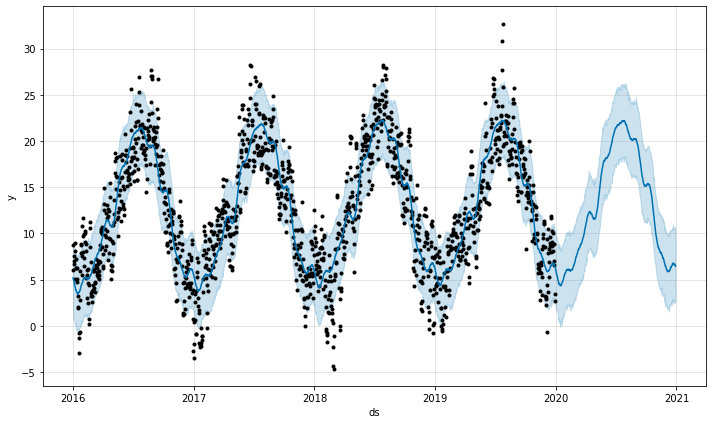

In [51]:
model_idf2020.plot(forecast_idf2020);

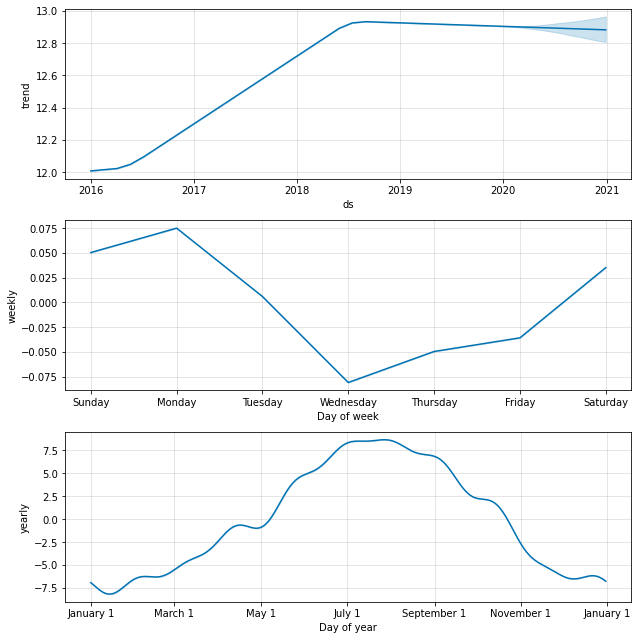

In [52]:
model.plot_components(forecast_idf2020);